# NASA TND 889

Generate our own data and compare it with that from page 4 of https://arc.aiaa.org/doi/pdf/10.2514/3.62081 - NASA TND 889

All of these values are at a point between station 9 and 10

Note:
- I assumed a fixed wall temperature of 300 K, I'm not sure what they used for the original data.


### Get the flight conditions from the NASA document
- I used http://www.graphreader.com/ to convert the graphs in the NASA document into actual data that we can use.
- The data in the dictionaries below is all in metric SI.

In [1]:
#x values are time, y values are the corresponding data

'''
The 'x' arrays are the same for the velocity and altitude data - this is required for our analysis
(they need to have the same time arrays)
'''

velocity_data = {"x":[16,16.5,17,17.5,18,18.5,19,19.5,20,20.5,21,21.5,22,22.5,23,23.5,24,24.5,25,25.5,26,26.5,27,27.5,28,28.5,29,29.5,30,30.5,31,31.5,32,32.5,33,33.5,34,34.5,35,35.5,36,36.5],
                 "y":[759.001,830.975,961.838,1302.079,1334.795,1302.079,1269.364,1223.562,1184.303,1138.502,1099.243,1053.441,1007.639,988.01,1020.726,1092.7,1161.403,1236.648,1302.079,1374.054,1446.028,1531.088,1619.42,1707.752,1805.899,1897.503,1949.848,1973.566,1976.02,1976.02,1962.934,2303.176,2702.306,2990.203,3121.065,3114.522,3101.435,3094.892,3080.497,3068.72,3062.177,3049.091]}

altitude_data = {"x":[16,16.5,17,17.5,18,18.5,19,19.5,20,20.5,21,21.5,22,22.5,23,23.5,24,24.5,25,25.5,26,26.5,27,27.5,28,28.5,29,29.5,30,30.5,31,31.5,32,32.5,33,33.5,34,34.5,35,35.5,36,36.5],
                 "y":[4712.245,5104.933,5759.411,6184.822,6675.681,7199.264,7722.847,8115.534,8639.117,9031.804,9424.491,9817.178,10209.865,10733.448,11126.135,11518.822,12042.405,12513.629,13089.571,13482.258,14005.84,14660.319,15183.902,15838.38,16492.859,17147.337,17801.816,18587.19,19372.564,20027.043,20812.417,21597.791,22710.405,23823.018,25001.08,26310.037,27488.098,28797.055,30106.012,31676.761,32920.27,34032.883]}


### Specify the nosecone and create the HeatTransfer analysis object

Nosecone dimensions from the NASA documents: xprime = 2.504 ft = 0.7632192 m , yprime = 0.25 ft = 0.0762 m

In [2]:
import torch

tangent_ogive = torch.TangentOgive(xprime = 0.7632192, yprime = 0.0762)

time_data = velocity_data["x"]        #Could also use altitude_data["x"] - both are the same

analysis = torch.AeroHeatingAnalysis(tangent_ogive, 
                                     time_data, 
                                     altitude_data["y"], 
                                     velocity_data["y"],
                                     fixed_wall_temperature = True,
                                     starting_temperature = 300) 
analysis.run()

'''Can output data to a .json file if we want'''
#analysis.to_json("NASA TND889.json")
#analysis.from_json("NASA TND889.json")


0.0% complete, i = 0


D:\anaconda3\lib\site-packages\thermo\viscosity.py:826: RuntimeWarning: invalid value encountered in double_scalars
  D = 0.3257/((1.0039-Tr**2.573)**0.2906) - 0.2086


10.0% complete, i = 4
20.0% complete, i = 8
30.0% complete, i = 12
40.0% complete, i = 16
50.0% complete, i = 20
60.0% complete, i = 24
70.0% complete, i = 28
80.0% complete, i = 32
90.0% complete, i = 36
100.0% complete, i = 40


'Can output data to a .json file if we want'

### Plot graphs

Get the data NASA generated using the FORTRAN program, so we can compare it to the data our Python program generated.

In [3]:
rex_data = {"x":[15.5,16,16.5,17,17.5,18,18.5,19,19.5,20,20.5,21,21.5,22,22.5,23,23.5,24,24.5,25,25.5,26,26.5,27,27.5,28,28.5,29,29.5,30,30.5,31,31.5,32,32.5,33,33.5,34,34.5,35,35.5,36,36.5],
            "y":[12102505.652,13160445.416,14353494.495,15654443.989,18090353.726,18387087.432,17396000.512,16458334.411,15571209.682,14786837.292,14205883.059,13647531.886,13111126.27,12595803.66,12100735.404,11877040.443,11848696.852,11820613.027,11792404.096,11764453.696,11736378.784,11708370.872,11465622.72,11156778.823,10856254.105,10541869.776,10136587.292,9418130.544,8473605.389,7623804.741,5304445.602,3588480.481,3374700.953,3186164.8,3023258.58,2868681.634,2319618.002,1899266.388,1605792.45,1357665.997,1239427.639,1135705.901,1029794.548]}

qlam_data = {"x":[15,15.5,16,16.5,17,17.5,18,18.5,19,19.5,20,20.5,21,21.5,22,22.5,23,23.5,24,24.5,25,25.5,26,26.5,27,27.5,28,28.5,29,29.5,30,30.5,31,31.5,32,32.5,33,33.5,34,34.5,35,35.5,36,36.5],
             "y":[3582.504,2489.143,7963.705,12878.017,19021.876,37116.14,46200.347,39452.197,32962.191,27801.511,25254.8,22708.089,20161.378,17614.666,14800.447,12538.765,12538.765,14428.885,16481.846,18946.148,22356.151,25766.155,29176.158,31650.882,33566.979,35483.076,37399.173,39315.27,41687.322,42990.051,40514.866,36682.672,34895.491,35893.937,44663.696,57153.97,72099.527,69749.337,62811.744,59048.285,55328.966,51409.676,45907.031,41198.799]}

qturb_data = {"x":[15,15.5,16,16.5,17,17.5,18,18.5,19,19.5,20,20.5,21,21.5,22,22.5,23,23.5,24,24.5,25,25.5,26,26.5,27,27.5,28,28.5,29,29.5,30,30.5,31,31.5,32,32.5,33,33.5,34,34.5,35,35.5,36,36.5],
              "y":[34563.378,49540.033,107993.496,168992.164,223838.211,433950.451,483862.019,425903.936,380037.93,334171.924,288305.918,242439.912,204684.323,179168.54,153652.757,129195.956,138541.853,147887.751,164395.429,183532.266,202669.103,221110.689,238333.842,255556.996,273677.602,291838.07,300624.77,308468.141,306235.898,282063.051,257870.056,233365.569,208861.083,226843.02,259098.536,299653.194,347476.595,301548.186,255619.778,223764.208,193810.898,166804.391,143840.187,123294.458]}

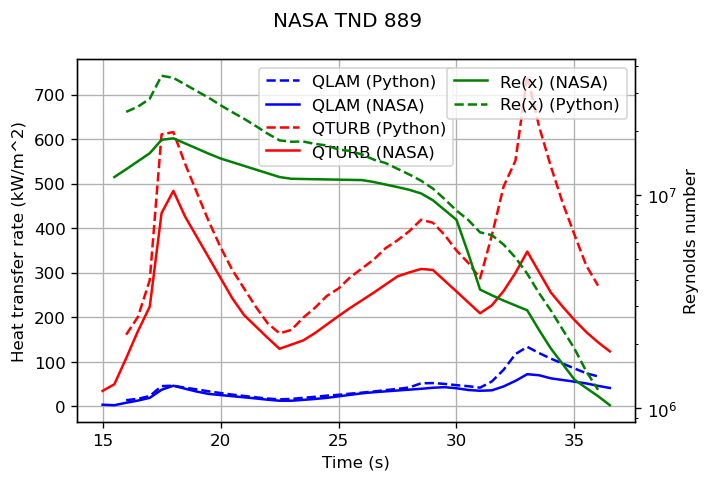

In [4]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 120

#Plot the heat transfer rates we generated against the data provided by NASA
fig, ax1 = plt.subplots()
fig.suptitle("NASA TND 889")

#Plot heat transfer rates
ax1.plot(time_data, analysis.q_lam[9, :]/1000, label="QLAM (Python)", color="blue", linestyle="--")
ax1.plot(qlam_data["x"], np.array(qlam_data["y"])/1000, label="QLAM (NASA)", color="blue")
ax1.plot(time_data, analysis.q_turb[9, :]/1000, label="QTURB (Python)", color="red", linestyle='--')
ax1.plot(qturb_data["x"], np.array(qturb_data["y"])/1000, label="QTURB (NASA)", color="red")

ax1.set_xlabel("Time (s)")
ax1.set_ylabel("Heat transfer rate (kW/m^2)")
ax1.grid()
ax1.legend()

#Plot local Reynolds number using a different y-scale
ax2 = ax1.twinx()       #Second axes that shares the same x-axis as ax1
ax2.set_yscale("log")   #Make the scale logorithmic
ax2.plot(rex_data["x"], rex_data["y"], label="Re(x) (NASA)", color="green")
ax2.plot(time_data, analysis.Rex[9, :], label="Re(x) (Python)", color="green", linestyle='--')
ax2.set_ylabel("Reynolds number")
ax2.legend()

plt.show()
